In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [59]:
data = pd.read_csv('../data/course+-+Quiz+P4+(1).csv')

data.dtypes

Position           int64
Sexe              object
Temps             object
Dept               int64
Temps_secondes     int64
Age                int64
dtype: object

In [35]:
print(st.pearsonr(data['Position'] , data['Age']))

(0.1060649087157278, 0.05069494656689001)


Corrélation entre la discrétisation de l'âge et la Position :
Coefficient de corrélation : 0.09445557270248528
P-valeur : 0.08200823370996943


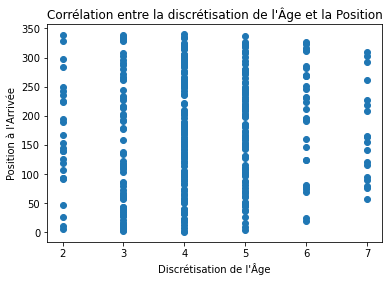

In [39]:
# Discrétisation de la variable Age en tranches de 10 ans
taille_classe = 10
tranches = np.arange(0, max(data['Age']), taille_classe)
tranches += taille_class//2
indices = np.digitize(data['Age'], tranches)

# Calcul de la corrélation entre la variable discrétisée Age et la Position
correlation = st.pearsonr(indices, data['Position'])

print("Corrélation entre la discrétisation de l'âge et la Position :")
print("Coefficient de corrélation :", correlation[0])
print("P-valeur :", correlation[1])

# Tracé d'un graphique de dispersion
plt.scatter(indices, data['Position'])
plt.xlabel("Discrétisation de l'Âge")
plt.ylabel("Position à l'Arrivée")
plt.title("Corrélation entre la discrétisation de l'Âge et la Position")
plt.show()

0.862176619462295 134.33169081355678 0.0112497648608757


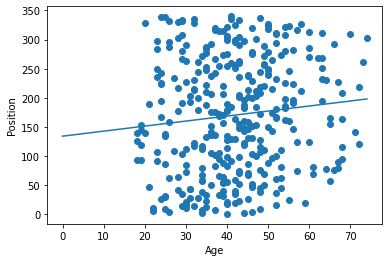

In [51]:
import statsmodels.api as sm

Y = data['Position']
X = data[['Age']]
X = X.copy()

X['intercept'] = 1
result = sm.OLS(Y, X).fit()
a,b = result.params['Age'],result.params['intercept']
r = result.rsquared

print(a,b,r)

plt.scatter(data['Age'] , data['Position'])
plt.plot(np.arange(75) , [a*x + b for x in range(75)])
plt.xlabel("Age")
plt.ylabel("Position")
plt.show()

In [54]:
Y = "Temps_secondes" #quantitative
X = "Sexe" #qualitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print(eta_squared(data[X] , data[Y]))

0.20400517398334017
